# IMPORTING LIBRARIES

In [25]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  IMPORTING DATASET

In [2]:
data=pd.read_csv("Advertising.csv")

In [3]:
data.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [7]:
data= data.drop(columns=['Unnamed: 0'])

In [8]:
data


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
data.shape

(200, 4)

In [17]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


# DATA VISUALIZATION

<AxesSubplot:>

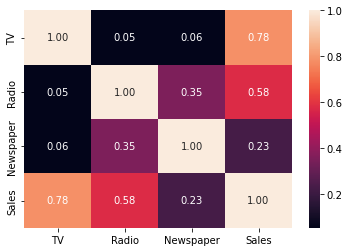

In [24]:
sns.heatmap(data.corr(), annot=True , fmt=".2f")

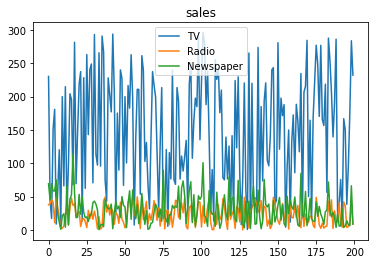

In [34]:
columns =["TV","Radio","Newspaper"]

x_data = range(0, data.shape[0])
y_data = range(0, data.shape[0])

fig, ax = plt.subplots()

for column in columns:
    ax.plot(x_data, data[column], label=column)

ax.set_title("sales")
ax.legend()

# TRAIN- TEST- SPLIT 

In [18]:
x = data.drop(columns="Sales")           
y = data["Sales"]  

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

# Applying an Multi Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(x_train,y_train)
predictions_test=model.predict(x_test)
print(model.score(x_test,y_test))

0.9286102071081018


# Regression Evaluation Metrics

In [38]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test,predictions_test)
print("Mean Absolute error:{}".format(MAE))



Mean Absolute error:1.157948931356705


In [36]:
MSE = metrics.mean_squared_error(y_test,predictions_test)
print('Mean Squared error: {}'.format(np.sqrt(MSE)))



Mean Squared error: 1.4335357663627921


In [37]:
R2 = metrics.r2_score(y_test,predictions_test)
print("R2 Score:{}".format(R2))

R2 Score:0.9286102071081018
